In [ ]:
import pandas as pd
import osmnx as ox
import os

csv_file_path = "../datasets/OpenWorld/train.csv"
image_directory = "../datasets/OpenWorld/images/train/00"

data = pd.read_csv(csv_file_path)

available_images = set(f.split('.')[0] for f in os.listdir(image_directory) if f.endswith('.jpg'))

/var/folders/8n/7kcjbmm92wv4f2ldlmlw82r40000gn/T/ipykernel_97725/4291274102.py:10: DtypeWarning: Columns (11,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path)


In [32]:


# Filter dataset to include only entries with matching images
data['id'] = data['id'].astype(str)
subset_with_images = data[data['id'].isin(available_images)].head(10000)

radius = 30
ids_with_amenities = {}

for index, row in subset_with_images.iterrows():
    image_id = row['id']
    latitude = row['latitude']
    longitude = row['longitude']
    
    tags = {'amenity': True}
    try:
        pois = ox.features.features_from_point((latitude, longitude), tags, dist=radius)
        if not pois.empty:
            # Initialize dictionary for this ID if not already done
            if image_id not in ids_with_amenities:
                ids_with_amenities[image_id] = {}
            for amenity in pois['amenity']:
                if amenity in ids_with_amenities[image_id]:
                    ids_with_amenities[image_id][amenity] += 1
                else:
                    ids_with_amenities[image_id][amenity] = 1
    except Exception as e:
        print(f"Error processing entry {index}: {e}")
        continue

# Convert the dictionary to a DataFrame for easy visualization
amenities_data = []
for image_id, amenities in ids_with_amenities.items():
    row_data = {'id': image_id}
    row_data.update(amenities)  # Add all amenities as columns
    amenities_data.append(row_data)

# Create a DataFrame with IDs as rows and amenities as columns
amenities_df = pd.DataFrame(amenities_data)
amenities_df = amenities_df.fillna(0)

output_file_path = "amenities.csv"
amenities_df.to_csv(output_file_path, index=False)


Error processing entry 35: No data elements in server response. Check log and query location/tags.
Error processing entry 319: No data elements in server response. Check log and query location/tags.
Error processing entry 321: No data elements in server response. Check log and query location/tags.
Error processing entry 587: No data elements in server response. Check log and query location/tags.
Error processing entry 778: No data elements in server response. Check log and query location/tags.
Error processing entry 1028: No data elements in server response. Check log and query location/tags.
Error processing entry 1065: No data elements in server response. Check log and query location/tags.
Error processing entry 1108: No data elements in server response. Check log and query location/tags.
Error processing entry 1166: No data elements in server response. Check log and query location/tags.
Error processing entry 1245: No data elements in server response. Check log and query location/ta

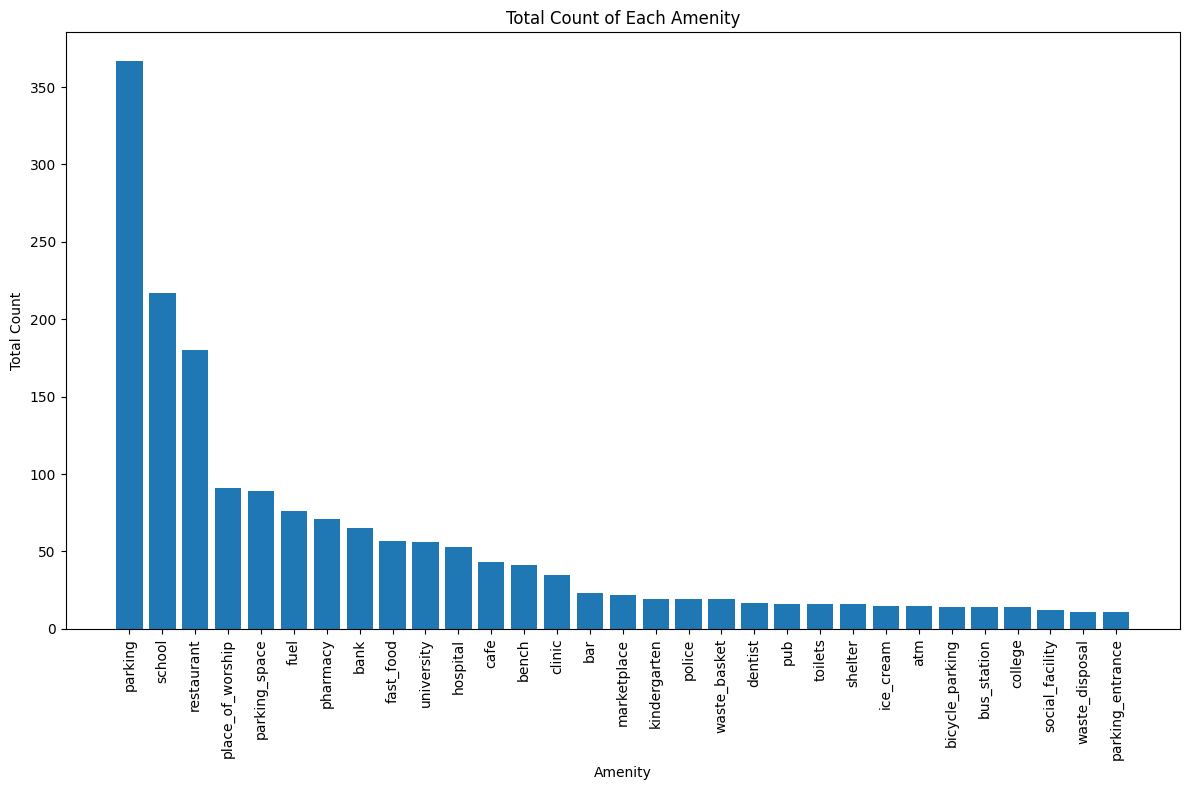

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the dictionary to count the occurrences of each amenity
amenity_counter = Counter()

for amenities in ids_with_amenities.values():
    for amenity, count in amenities.items():
        amenity_counter[amenity] += count

filtered_amenities = {amenity: count for amenity, count in amenity_counter.items() if count > 10}

# Convert the counter to a sorted list of amenities and counts
sorted_amenities = sorted(filtered_amenities.items(), key=lambda x: x[1], reverse=True)
amenities, counts = zip(*sorted_amenities)

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(amenities, counts)
plt.xlabel('Amenity')
plt.ylabel('Total Count')
plt.title('Total Count of Each Amenity')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()